In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['low-protein']


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [ ]:
print(y)
print(y.shape)

0        1
1        1
2        0
3        0
4        1
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: low-protein, Length: 50000, dtype: int64
(50000,)


In [ ]:
print(y_train)

20330    0
17532    1
45819    0
34807    1
31888    0
        ..
21243    1
45891    0
42613    0
43567    0
2732     0
Name: low-protein, Length: 40000, dtype: int64


In [ ]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 18 columns]


 **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.25 % and k = [13]


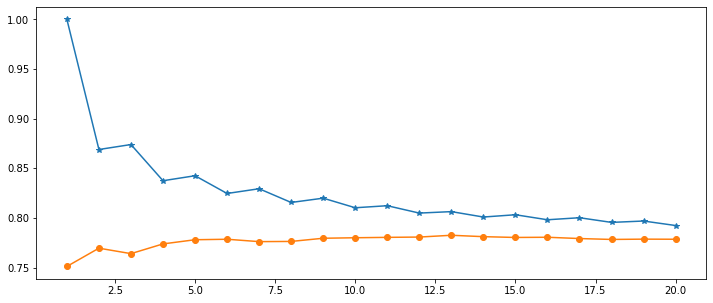

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7825

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6882,631,7513
1,1544,943,2487
All,8426,1574,10000


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      7513
           1       0.60      0.38      0.46      2487

    accuracy                           0.78     10000
   macro avg       0.71      0.65      0.66     10000
weighted avg       0.76      0.78      0.76     10000



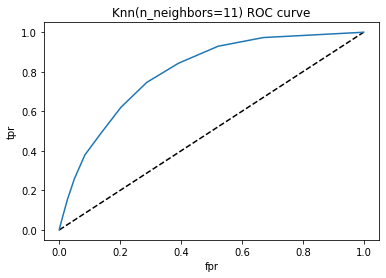

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=13) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.799860913914608

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.77165
Best Parameters: {'n_neighbors': 21}


**NAIVE** **BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [ ]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [ ]:
mod.score(X_test,y_test)

0.9975

In [ ]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[7493   20]
 [   5 2482]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7513
           1       0.99      1.00      0.99      2487

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.28780486
Iteration 2, loss = 0.05587496
Iteration 3, loss = 0.01482555
Iteration 4, loss = 0.00514478
Iteration 5, loss = 0.00274501
Iteration 6, loss = 0.00173282
Iteration 7, loss = 0.00117648
Iteration 8, loss = 0.00081975
Iteration 9, loss = 0.00055454
Iteration 10, loss = 0.00041711
Iteration 11, loss = 0.00034423
Iteration 12, loss = 0.00027391
Iteration 13, loss = 0.00022660
Iteration 14, loss = 0.00019952
Iteration 15, loss = 0.00016652
Iteration 16, loss = 0.00014194
Iteration 17, loss = 0.00010331
Iteration 18, loss = 0.00009098
Iteration 19, loss = 0.00007998
Iteration 20, loss = 0.00007083
Iteration 21, loss = 0.00006252
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.9998
[[7513    0]
 [   2 2485]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7513
           1       1.00      1.00      1.00      2487

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

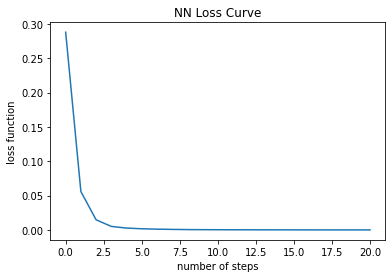

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [ ]:
(mlp.intercepts_[0]).shape

(10,)

In [ ]:
(mlp.coefs_[0]).shape

(18, 10)

In [ ]:
mlp.intercepts_[0]

array([ 0.35285755,  0.34703779,  0.12387921,  0.87294785,  0.10896084,
       -0.36571154,  0.10883868,  0.34345628,  0.65241267,  0.62458673])

In [ ]:
mlp.coefs_[0]

array([[ 2.30551565e-01,  8.76945708e-02,  5.06646414e-01,
        -1.24427205e-01,  1.48572364e-01, -6.15440341e-02,
         1.08188147e-01, -5.07314845e-01, -6.60876790e-01,
        -4.70664167e-01],
       [ 4.84087217e-01,  3.89465625e-01, -4.96981929e-01,
         1.13549444e-01, -8.14861663e-02,  3.91627220e-01,
         7.24188125e-03,  2.68986169e-01, -3.69353378e-01,
        -6.22272996e-01],
       [ 4.77952822e-01, -8.68136729e-02,  2.38235028e-01,
         4.27941237e-01, -5.06203209e-01, -1.93657082e-01,
         1.05583342e-01,  4.27449725e-01, -8.26898097e-01,
        -7.02133269e-01],
       [ 1.39316872e-01, -2.38782298e-01,  6.75108621e-02,
         1.98815952e-01, -4.88039472e-01,  2.67261840e-01,
         5.96384308e-02, -9.83217068e-02,  5.28176498e-02,
         1.63919792e-02],
       [ 4.12825302e-01, -1.28289445e-01, -4.17479397e-01,
         3.93495810e-01, -5.94259031e-01, -4.29327781e-01,
         1.46648399e-01,  2.77380745e-01, -4.72124556e-01,
        -9.

In [ ]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.53371038
Iteration 2, loss = 0.14940805
Iteration 3, loss = inf
Iteration 4, loss = 0.01756006
Iteration 5, loss = 0.00991849
Iteration 6, loss = 0.00620352
Iteration 7, loss = 0.00419909
Iteration 8, loss = 0.00298356
Iteration 9, loss = 0.00217869
Iteration 10, loss = 0.00164531
Iteration 11, loss = 0.00127142
Iteration 12, loss = 0.00101775
Iteration 13, loss = 0.00080422
Iteration 14, loss = 0.00065013
Iteration 15, loss = 0.00054294
Iteration 16, loss = 0.00045591
Iteration 17, loss = 0.00039188
Iteration 18, loss = 0.00033527
Iteration 19, loss = 0.00027891
Iteration 20, loss = 0.00035955
Iteration 21, loss = 0.00021897
Iteration 22, loss = 0.00016116
Iteration 23, loss = 0.00013254
Iteration 24, loss = 0.00010861
Iteration 25, loss = 0.00008945
Iteration 26, loss = 0.00007743
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.9998
[[7513    0]
 [   2 2485]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7513
           1       1.00      1.00      1.00      2487

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [ ]:
logreg.intercept_.T

array([-2.93562025])

In [ ]:
logreg.coef_.T

array([[ 7.98686327e-03],
       [ 7.69286836e-02],
       [ 2.56674333e-01],
       [ 2.45631437e-01],
       [ 4.04774074e-01],
       [ 8.77973025e-02],
       [ 3.64017907e+00],
       [ 4.57244349e-04],
       [ 7.79902406e-03],
       [-6.90990015e-02],
       [-7.50541364e-03],
       [ 3.29049454e-02],
       [ 6.98249834e-03],
       [ 7.40277754e-02],
       [ 1.46737479e-02],
       [-4.38100940e-01],
       [ 1.01539408e-01],
       [ 5.64324950e-02]])

In [ ]:
print(y_test)

11841    0
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    1
2217     0
Name: low-protein, Length: 10000, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[7513    0]
 [   0 2487]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7513
           1       1.00      1.00      1.00      2487

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

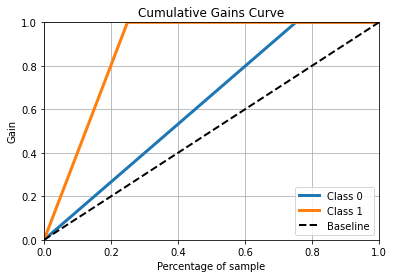

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

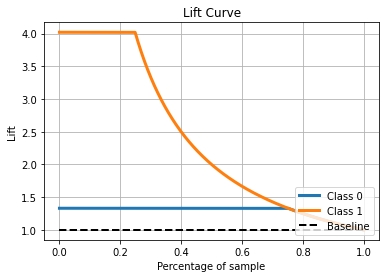

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()